# IMPORTER LES LIBRAIRIES

In [1]:
# Importer les librairies Pandas
import pandas as pd
import numpy as np

# Importer les librairies pour la visualisation
# seaborn = librairies pour data visualisation
import seaborn as sns

# Dépendances necessaires pour seaborn
# 1/ La librairie pyplot de matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# Fonction spéciale de Jupyter pour afficher les plots sur Jupyter Notebook
%matplotlib inline

# Importer stats de la librairie Scipy
from scipy import stats
# Importer la fonction 'norm' de la librairie Scipy.stats
from scipy.stats import norm

# Importer la fonction StandardScaler de sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Gérer les warnings
import warnings
warnings.filterwarnings('ignore')

# IMPORTER LES DONNÉES

In [2]:
# Importer les données
# index_col=0, veut dire que la première colonne et l'index des colonne
# Si on ne le met pas Pandas va ajouter un index au dataframe (= valeur incrementiel)
df = pd.read_csv("dataset/diabetes.csv", index_col=0, encoding="latin-1")

# AFFICHER LES INFORMATIONS

In [39]:
# Afficher les (5) premières lignes du DataFrame
print("\n------------------ Head -------------------")
print (df.head())

# Afficher les infos du DataFrame
print("\n------------------ Info -------------------")
print (df.info())

# Afficher les infos statistiques du DataFrame
print("\n---------------- Describe -----------------")
print (df.describe())


------------------ Head -------------------
             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
6                148             72             35        0  33.6   
1                 85             66             29        0  26.6   
8                183             64              0        0  23.3   
1                 89             66             23       94  28.1   
0                137             40             35      168  43.1   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                          
6                               0.627   50        1  
1                               0.351   31        0  
8                               0.672   32        1  
1                               0.167   21        0  
0                               2.288   33        1  

------------------ Info -------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index

In [8]:
# Afficher les infos statistiques d'une feature
print (df['BloodPressure'].describe())

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [40]:
# Verifier la correlation entre chaque features

# pearson : standard correlation coefficient
# print ("\n----------------- Pearson -----------------")
# print (df.corr(method='pearson'))

print ("\n----------------- Pearson -----------------")
print ("BloodPressure : ", df['BloodPressure'].corr(df['Outcome'], method='pearson'))
print ("Glucose : ", df['Glucose'].corr(df['Outcome'], method='pearson'))
print ("SkinThickness : ", df['SkinThickness'].corr(df['Outcome'], method='pearson'))
print ("Insulin : ", df['Insulin'].corr(df['Outcome'], method='pearson'))
print ("BMI : ", df['BMI'].corr(df['Outcome'], method='pearson'))
print ("DiabetesPedigreeFunction : ", df['DiabetesPedigreeFunction'].corr(df['Outcome'], method='pearson'))

# kendall : Kendall Tau correlation coefficient
# print ("\n----------------- Kendall -----------------")
# print (df.corr(method='kendall'))

# spearman : Spearman rank correlation
# print ("\n---------------- Spearman------------------")
# print (df.corr(method='spearman'))


----------------- Pearson -----------------
BloodPressure :  0.06506835955033283
Glucose :  0.466581398306874
SkinThickness :  0.07475223191831938
Insulin :  0.13054795488404766
BMI :  0.2926946626444455
DiabetesPedigreeFunction :  0.17384406565296004


In [28]:
# Afficher la distribution d'une feature
print("\n--------------- Distribution --------------")
print (df['Outcome'].value_counts())
print("\n------------- % Distribution --------------")
print (df['Outcome'].value_counts()/len(df))


--------------- Distribution --------------

0    500
1    268
Name: Outcome, dtype: int64

------------- % Distribution --------------

0    0.651042
1    0.348958
Name: Outcome, dtype: float64


In [35]:
# Afficher le types de données par features
print (df.dtypes)

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# SPILITTER LE DATAFRAME

In [ ]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# VISUALISER LES DONNÉES

## HISTOGRAMME UNIVARIÉ


-------- Distribution de 'Outcome' -------



Text(0.5,1,"Distribution de 'Outcome'")

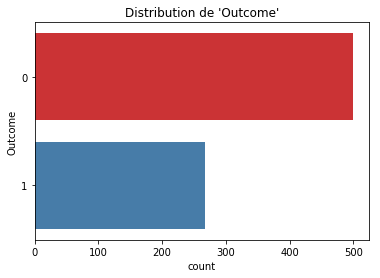

In [29]:
# Afficher le graph de distribution des données d'une feature
# Affichage défini sur y
# Pour un affichage sur x => x = 'Outcome'
print("\n-------- Distribution de 'Outcome' -------")
sns.countplot(y='Outcome', data=df,
                  palette="Set1")
plt.title("Distribution de 'Outcome'")

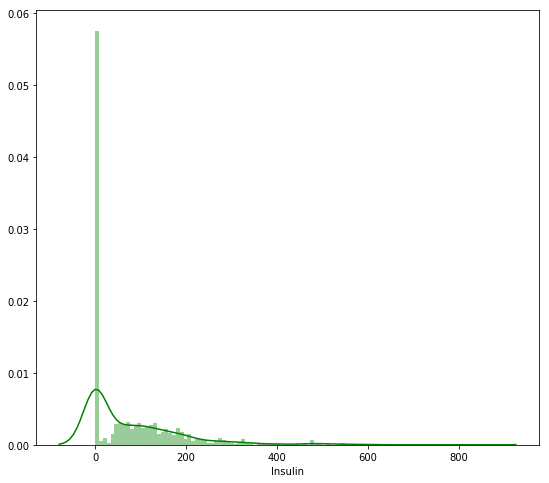

In [34]:
# Afficher le graphique de la distribution d'une feature
plt.figure(figsize=(9, 8))
sns.distplot(df['Insulin'], color='g', bins=100, hist_kws={'alpha': 0.4});

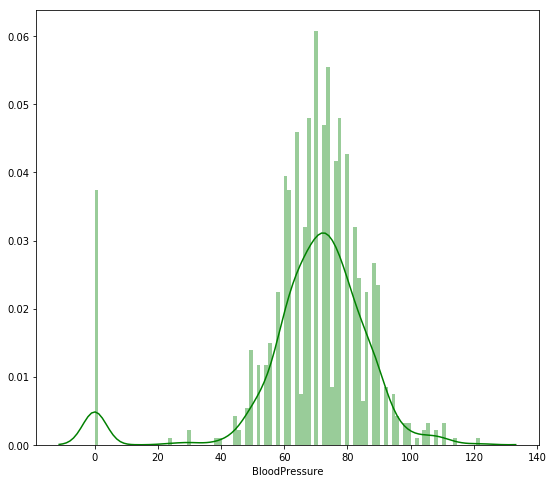

In [41]:
# Afficher le graphique de la distribution d'une feature
plt.figure(figsize=(9, 8))
sns.distplot(df['BloodPressure'], color='g', bins=100, hist_kws={'alpha': 0.4});


-------- Distribution de 'Outcome' -------
------- en fonction de 'BloodPressure' ----------



Text(0.5,1,"Distribution de 'Survived' en fonction de 'BloodPressure'")

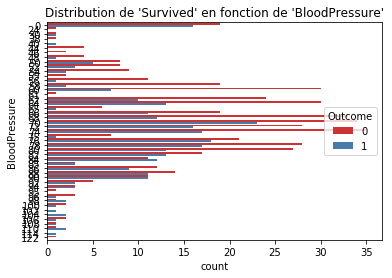

In [24]:
# Afficher le graph des données de la colonne 'Sex' (y=) en fonction de 'Survived' (hue=) 
# Utiliser la palette 'c_palette' définie plus haut
# Affichage défini sur y
# Pour un affichage sur x => x = 'Sex'
print("\n-------- Distribution de 'Outcome' -------")
print("------ en fonction de 'BloodPressure' ------")
sns.countplot(y='BloodPressure', hue='Outcome', data=df,
                  palette="Set1")
plt.title("Distribution de 'Survived' en fonction de 'BloodPressure'")

##  BOX PLOT


-------------- Boxplot de 'Insulin' --------------
En ajoutant le points en dehors de la Boxplot (swarmplot())



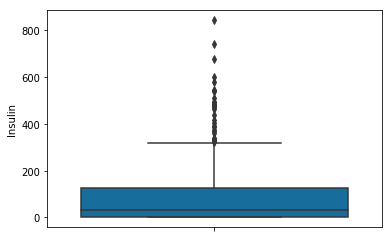

In [33]:
# Afficher le BOX PLOT des données de la colonne 'Age' (y=) 
print("\n-------------- Boxplot de 'Insulin' --------------")
print("En ajoutant le points en dehors de la Boxplot (swarmplot())\n")
sns.boxplot(y='Insulin', data=df,
                palette='colorblind', ax=None, order=None) 
# Ajouter swarmplot
# Draw a categorical scatterplot with non-overlapping points.
# sns.swarmplot(y='BloodPressure', data=df, palette='colorblind', ax=None, order=None)

# NETTOYER LES DONNÉES

In [38]:
# Verifier si il y a des valeurs nulles
print("\n------------ Valeurs manquantes -----------")
print (df.isnull().any())

print("\n------------ Valeurs manquantes -----------")
print (df.isnull().mean().sort_values(ascending=False)*100)


------------ Valeurs manquantes -----------
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

------------ Valeurs manquantes -----------
Outcome                     0.0
Age                         0.0
DiabetesPedigreeFunction    0.0
BMI                         0.0
Insulin                     0.0
SkinThickness               0.0
BloodPressure               0.0
Glucose                     0.0
dtype: float64


In [ ]:
# Faire une copy pour travailler dessus
training_df = df.copy()